# Precision Recall Tradeoff



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve

In [2]:
digit = load_digits()

In [3]:
X = digit.data
y = digit.target == 9

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9822222222222222

In [5]:
from sklearn.dummy import DummyClassifier

In [6]:
dum = DummyClassifier()
dum.fit(X_train, y_train)
dum.score(X_test, y_test)

0.7911111111111111

In [7]:
lr_pred = clf.predict(X_test)
dum_pred = dum.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
print(confusion_matrix(lr_pred, y_test))

[[390   6]
 [  2  52]]


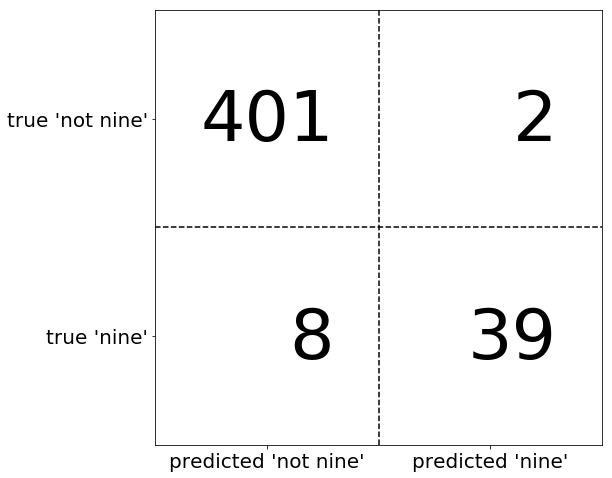

In [10]:
mglearn.plots.plot_confusion_matrix_illustration()

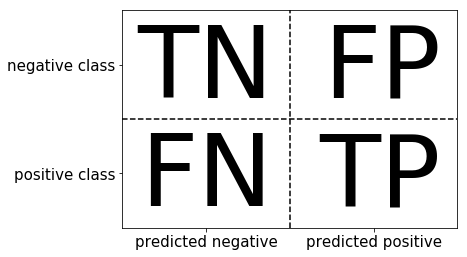

In [11]:
mglearn.plots.plot_binary_confusion_matrix()

In [12]:
from sklearn.datasets import load_breast_cancer

In [13]:
cancer = load_breast_cancer()

In [14]:
X = cancer.data
y = cancer.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
pred = clf.predict(X_test)
confusion_matrix(pred, y_test)

array([[56,  5],
       [ 4, 78]])

In [18]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93        60
          1       0.95      0.94      0.95        83

avg / total       0.94      0.94      0.94       143



### Changing the Threshold

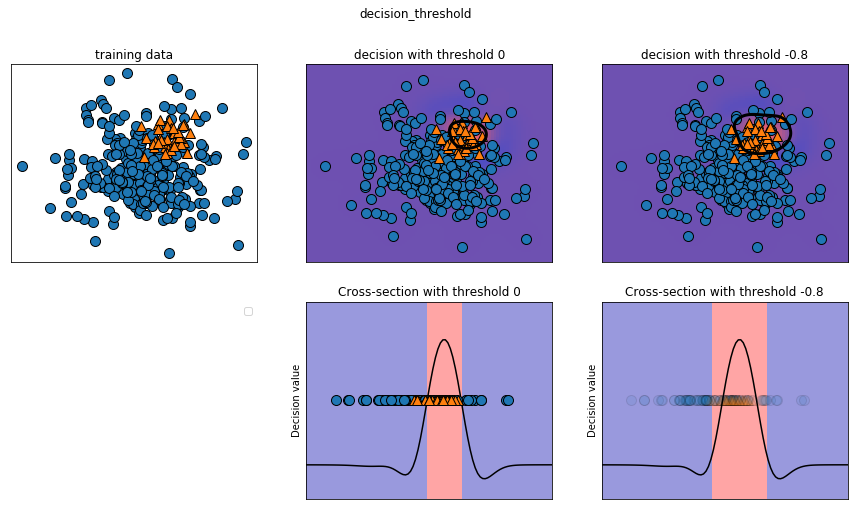

In [20]:
mglearn.plots.plot_decision_threshold()

In [42]:
lowered_thresh = clf.decision_function(X_test) > -1.0

In [43]:
print(classification_report(lowered_thresh, y_test))

             precision    recall  f1-score   support

      False       0.88      0.93      0.91        57
       True       0.95      0.92      0.93        86

avg / total       0.92      0.92      0.92       143



In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
precision, recall, thresholds = precision_recall_curve(y_test, clf.decision_function(X_test))

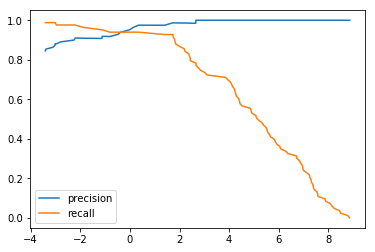

In [25]:
plt.plot(thresholds, precision[1:],  label = 'precision')
plt.plot(thresholds, recall[1:], label = 'recall')
plt.legend()

             precision    recall  f1-score   support

          0       0.93      0.92      0.93        61
          1       0.94      0.95      0.95        82

avg / total       0.94      0.94      0.94       143



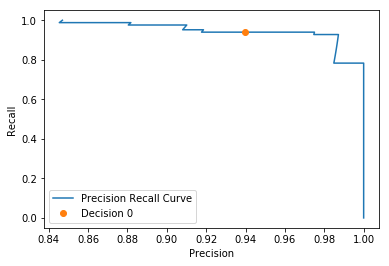

In [26]:
smallest = np.argmin(np.abs(thresholds))
plt.plot(precision, recall, label = 'Precision Recall Curve')
plt.plot(precision[smallest], recall[smallest], 'o', label = 'Decision 0')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend();
print(classification_report(pred, y_test))

### ROC Curve

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))

Text(0,0.5,'True Positive Rate')

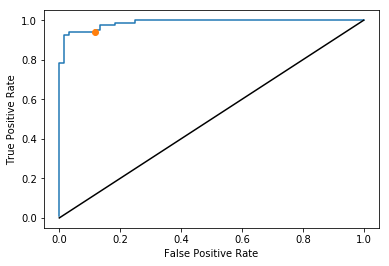

In [28]:
smallest = np.argmin(np.abs(thresholds))
plt.plot(fpr, tpr)
plt.plot(fpr[smallest], tpr[smallest], 'o')
plt.plot(fpr, fpr, c = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9873493975903614

### Using Metrics in Model Selection

In [31]:
from sklearn.cross_validation import cross_val_score

/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
cross_val_score(clf, X_train, y_train, scoring = 'accuracy')

array([0.94405594, 0.92957746, 0.97163121])

In [33]:
cross_val_score(clf, X_train, y_train, scoring = 'precision')

array([0.95652174, 0.93548387, 0.96774194])

In [34]:
cross_val_score(clf, X_train, y_train, scoring = 'recall')

array([0.95652174, 0.95604396, 0.98901099])

In [35]:
cross_val_score(clf, X_train, y_train, scoring = 'roc_auc')

array([0.99126172, 0.9719888 , 0.99802198])

In [44]:
params = {'C': [0.1, 1.0, 5, 10, 50, 100, 400, 1000]}
grid = GridSearchCV(clf, param_grid=params, scoring = 'roc_auc')

In [45]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 5, 10, 50, 100, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [46]:
grid.best_params_

{'C': 50}